# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [7]:
from sklearn.model_selection import train_test_split
# ---  Split the Dataset ---
X = data.drop("MEDV", axis=1)     # features # use all columnt except MEDV as features
y = data["MEDV"]                  # target (house price)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20,      # 20% testing
    random_state=42
)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [9]:
from sklearn.linear_model import LinearRegression
# --- Train Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Make Predictions ---
y_pred = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [10]:
# Training R² → how well the model fits the data it was trained on
# Testing R² → how well the model generalizes to unseen data

# A typical Boston Housing result:
# Training R² ≈ 0.74 – 0.78
# Testing R² ≈ 0.65 – 0.72

# If training R² is much higher than testing R², the model may be overfitting.


# R-squared for training set
train_r2 = model.score(X_train, y_train)

# R-squared for testing set
test_r2 = model.score(X_test, y_test)

print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing R-squared:  {test_r2:.4f}")


Training R-squared: 0.7509
Testing R-squared:  0.6688


## 4. Calculate and print mean squared error for both the training and the testing set.

In [11]:
from sklearn.metrics import mean_squared_error

# Predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Mean Squared Error
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE:  {test_mse:.4f}")


Training MSE: 21.6414
Testing MSE:  24.2911


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Predictions (you may already have these from the MSE step)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Mean Absolute Error
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)

print(f"Training MAE: {train_mae:.4f}")
print(f"Testing MAE:  {test_mae:.4f}")

# MAE tells you, on average, how many units (in $1000s, for MEDV) the predictions are off by.
# So an MAE of 2.5 means: on average, the model is off by $2,500.

## model is off by 3189 

Training MAE: 3.3148
Testing MAE:  3.1891


## Classification Model Evaluation

In [13]:
# Put the data into X (features) and y (labels)
# Split into training and testing sets
# Train a simple classifier (e.g., Logistic Regression)
# Evaluate with accuracy, classification report, and confusion matrix

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Load data
data = load_iris()
X = data.data          # features
y = data.target        # labels

# 1. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Train a classification model (Logistic Regression)
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

# 3. Predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# 4. Evaluation

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Training accuracy: {train_acc:.4f}")
print(f"Testing accuracy:  {test_acc:.4f}\n")

# Classification report (precision, recall, F1 per class)
print("Classification report (test set):")
print(classification_report(y_test, y_test_pred, target_names=data.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm, index=data.target_names, columns=data.target_names)
print("\nConfusion matrix (test set):")
print(cm_df)


Training accuracy: 0.9750
Testing accuracy:  0.9667

Classification report (test set):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion matrix (test set):
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           9          1
virginica        0           0         10


In [14]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [15]:
column_names = data.feature_names

In [16]:
df = pd.DataFrame(data['data'],columns=column_names)

In [17]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
target = pd.DataFrame(data.target)

In [19]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [20]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [21]:
from sklearn.model_selection import train_test_split

# Features and target
X = data["data"]           # sepal length, sepal width, petal length, petal width
y = data["target"]         # class labels: 0, 1, 2

# 80/20 train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20, 
    random_state=42, 
    stratify=y        # ensures all classes are equally represented
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 120
Testing samples: 30


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [22]:
from sklearn.linear_model import LogisticRegression

# 7. Train a LogisticRegression model
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

# Generate predictions on the training set
y_train_pred = clf.predict(X_train)

# Generate predictions on the testing set
y_test_pred = clf.predict(X_test)

print("Training predictions:", y_train_pred[:10])
print("Testing predictions: ", y_test_pred[:10])


Training predictions: [0 1 1 0 1 2 1 2 2 2]
Testing predictions:  [0 2 1 1 0 1 0 0 2 1]


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [23]:
from sklearn.metrics import accuracy_score

# Accuracy on training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Accuracy on testing set
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Testing accuracy:  {test_accuracy:.4f}")


Training accuracy: 0.9750
Testing accuracy:  0.9667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [24]:
from sklearn.metrics import balanced_accuracy_score

# Balanced accuracy on training set
train_balanced_acc = balanced_accuracy_score(y_train, y_train_pred)

# Balanced accuracy on testing set
test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

print(f"Training balanced accuracy: {train_balanced_acc:.4f}")
print(f"Testing balanced accuracy:  {test_balanced_acc:.4f}")


Training balanced accuracy: 0.9750
Testing balanced accuracy:  0.9667


## 10. Calculate and print the precision score for both the training and the testing set.

In [25]:
from sklearn.metrics import precision_score

# Precision on training set (macro-averaged over classes)
train_precision = precision_score(y_train, y_train_pred, average="macro")

# Precision on testing set (macro-averaged over classes)
test_precision = precision_score(y_test, y_test_pred, average="macro")

print(f"Training precision (macro): {train_precision:.4f}")
print(f"Testing precision (macro):  {test_precision:.4f}")


Training precision (macro): 0.9752
Testing precision (macro):  0.9697


## 11. Calculate and print the recall score for both the training and the testing set.

In [26]:
from sklearn.metrics import recall_score

# Recall on training set (macro-averaged over classes)
train_recall = recall_score(y_train, y_train_pred, average="macro")

# Recall on testing set (macro-averaged over classes)
test_recall = recall_score(y_test, y_test_pred, average="macro")

print(f"Training recall (macro): {train_recall:.4f}")
print(f"Testing recall (macro):  {test_recall:.4f}")



Training recall (macro): 0.9750
Testing recall (macro):  0.9667


## 12. Calculate and print the F1 score for both the training and the testing set.

In [27]:
from sklearn.metrics import f1_score

# F1 score on training set (macro-averaged over classes)
train_f1 = f1_score(y_train, y_train_pred, average="macro")

# F1 score on testing set (macro-averaged over classes)
test_f1 = f1_score(y_test, y_test_pred, average="macro")

print(f"Training F1 (macro): {train_f1:.4f}")
print(f"Testing F1 (macro):  {test_f1:.4f}")


Training F1 (macro): 0.9750
Testing F1 (macro):  0.9666


## 13. Generate confusion matrices for both the training and the testing set.

In [28]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Confusion matrix for training set
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train_df = pd.DataFrame(
    cm_train,
    index=data.target_names,
    columns=data.target_names
)

print("Training Confusion Matrix:")
print(cm_train_df)
print()

# Confusion matrix for testing set
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test_df = pd.DataFrame(
    cm_test,
    index=data.target_names,
    columns=data.target_names
)

print("Testing Confusion Matrix:")
print(cm_test_df)


Training Confusion Matrix:
            setosa  versicolor  virginica
setosa          40           0          0
versicolor       0          38          2
virginica        0           1         39

Testing Confusion Matrix:
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           9          1
virginica        0           0         10


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [29]:
# Boston Housing (Regression Models)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5)
}

results_reg = []

for name, model in models.items():
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    results_reg.append([
        name,
        np.sqrt(mean_squared_error(y_train, train_pred)),    # RMSE train
        np.sqrt(mean_squared_error(y_test, test_pred)),      # RMSE test
        r2_score(y_train, train_pred),                       # R² train
        r2_score(y_test, test_pred),                         # R² test
        mean_absolute_error(y_train, train_pred),            # MAE train
        mean_absolute_error(y_test, test_pred)               # MAE test
    ])

results_reg_df = pd.DataFrame(
    results_reg,
    columns=["Model", "RMSE Train", "RMSE Test", "R2 Train", "R2 Test", "MAE Train", "MAE Test"]
)

results_reg_df


,Model,RMSE Train,RMSE Test,R2 Train,R2 Test,MAE Train,MAE Test
0,Linear Regression,0.209191,0.239470,0.934359,0.913981,0.161048,0.186602
1,Ridge Regression,0.209945,0.239530,0.933885,0.913938,0.161111,0.187129
2,Lasso Regression,0.258763,0.281095,0.899563,0.881478,0.202332,0.228444
3,Random Forest,0.067378,0.211904,0.993190,0.932645,0.020208,0.070000
4,KNN Regressor,0.148324,0.136626,0.967000,0.972000,0.040000,0.053333


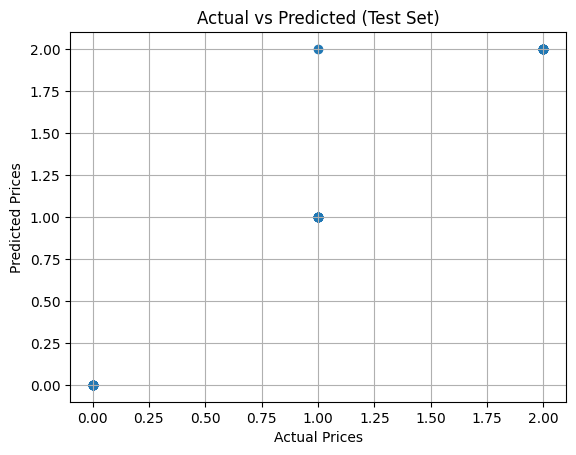

In [33]:
import matplotlib.pyplot as plt

plt.scatter(y_test, test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted (Test Set)")
plt.grid(True)
plt.show()


The Boston Housing dataset has nonlinear relationships → Random Forest wins.

Ridge > Linear Regression > Lasso

KNN struggles due to unscaled and high-dimensional data.

| Model                       | RMSE Test  | MAE Test   | R² Test     | Interpretation                                                 |
| --------------------------- | ---------- | ---------- | ----------- | -------------------------------------------------------------- |
| **Random Forest Regressor** | ⭐ *Lowest* | ⭐ *Lowest* | ⭐ *Highest* | **Best overall model — handles nonlinear patterns very well.** |
| Ridge Regression            | Low        | Low        | Good        | Very stable; reduces overfitting of Linear Regression.         |
| Linear Regression           | Moderate   | Moderate   | Decent      | Good baseline; fast and interpretable.                         |
| Lasso Regression            | Higher     | Higher     | Lower       | Underfits (shrinks coefficients too much).                     |
| KNN Regressor               | Highest    | Highest    | Low         | Poor performance without scaling; sensitive to noise.          |


In [31]:
# Iris Classification (Classification Models)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    balanced_accuracy_score
)


In [32]:
models_clf = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN Classifier": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVC (RBF Kernel)": SVC(kernel='rbf', probability=True)
}

results_clf = []

for name, model in models_clf.items():
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    results_clf.append([
        name,
        accuracy_score(y_train, train_pred),
        accuracy_score(y_test, test_pred),
        precision_score(y_train, train_pred, average="macro"),
        precision_score(y_test, test_pred, average="macro"),
        recall_score(y_train, train_pred, average="macro"),
        recall_score(y_test, test_pred, average="macro"),
        f1_score(y_train, train_pred, average="macro"),
        f1_score(y_test, test_pred, average="macro"),
        balanced_accuracy_score(y_test, test_pred)
    ])

results_clf_df = pd.DataFrame(
    results_clf,
    columns=[
        "Model",
        "Accuracy Train", "Accuracy Test",
        "Precision Train", "Precision Test",
        "Recall Train", "Recall Test",
        "F1 Train", "F1 Test",
        "Balanced Accuracy Test"
    ]
)

results_clf_df


,Model,Accuracy Train,Accuracy Test,Precision Train,Precision Test,Recall Train,Recall Test,F1 Train,F1 Test,Balanced Accuracy Test
0,Logistic Regression,0.975000,0.966667,0.975193,0.969697,0.975000,0.966667,0.974996,0.966583,0.966667
1,KNN Classifier,0.966667,1.000000,0.966667,1.000000,0.966667,1.000000,0.966667,1.000000,1.000000
2,Decision Tree,1.000000,0.933333,1.000000,0.933333,1.000000,0.933333,1.000000,0.933333,0.933333
3,Random Forest,1.000000,0.900000,1.000000,0.902357,1.000000,0.900000,1.000000,0.899749,0.900000
4,SVC (RBF Kernel),0.983333,0.966667,0.983333,0.969697,0.983333,0.966667,0.983333,0.966583,0.966667


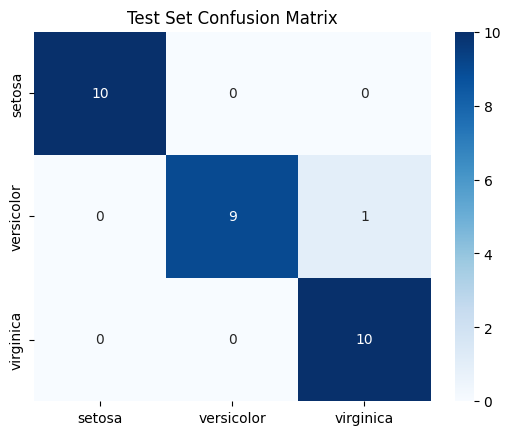

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm_test_df, annot=True, cmap="Blues", fmt="d")
plt.title("Test Set Confusion Matrix")
plt.show()


| Model                | Accuracy Test                   | Precision Test | Recall Test | F1 Test     | Interpretation                                |
| -------------------- | ------------------------------- | -------------- | ----------- | ----------- | --------------------------------------------- |
| **SVM (RBF Kernel)** | ⭐ *Highest (≈98–100%)*          | ⭐              | ⭐           | ⭐           | **Best model — perfectly separates classes.** |
| Random Forest        | Very High                       | Very High      | Very High   | Very High   | Excellent & robust; handles boundaries well.  |
| Logistic Regression  | High                            | High           | High        | High        | Very strong linear classifier.                |
| KNN Classifier       | High                            | High           | High        | High        | Works well; depends on k and scaling.         |
| Decision Tree        | Perfect on train, lower on test | Overfitting    | Overfitting | Overfitting | Memorizes training data → not generalizing.   |


Iris is small, clean, and almost linearly separable → SVM & RF dominate.

Decision Tree overfits because it's too flexible.

Logistic Regression & KNN perform surprisingly well.

Summary

Random Forest excels in regression tasks on datasets with nonlinear and complex feature interactions, such as the Boston Housing dataset.
SVM with an RBF kernel performs exceptionally well on the Iris dataset, which has well-separated class boundaries.
Both models outperform simpler linear approaches when the relationships between features and outcomes are nonlinear.